### Сглаживание и прогнозирование временных рядов.

####    1. Cистематические эффекты в поведении временного ряда

В динамике уровней ряда могут наблюдаться «систематические эффекты»:

- некоторая основная тенденция (trend),
- циклические колебания (cyclicity);
- сезонная изменчивость {seasonality).

После учета этих систематических эффектов остается некоторая флуктуация, которая носит нерегулярный характер (irregularity).

####    2. Мультипликативная и  аддитивная формы модели

-  Аддитивная модель: уровень ряда $x_t$ представляется в виде суммы тренда, циклической, сезонной и нерегулярной компонент
$$x_t = T_t + C_t + S_t + I_t$$

- Мультипликативная модель: произведение этих компонент 
$$x_t = T_t C_t S_t I_t$$

####    3. Простое скользящее среднее с периодом усреднения K 

Простое скользящее среднее (SMA — simple moving average) с периодом
усреднения $K$ формируется путем усреднения $K$ последовательных значений ряда  $x_1, ... ,  x_T$. 

Если в качестве $K$ берется нечетное
число, $K =  2m + 1$, то значение $x_i$ исходного ряда заменяется значением
$$sma_i = \frac{x_{i - m} + x_{i - m+1} + ... + x_{i+m}}{K}$$

Разумеется, значения $sma_i$ определяются только для $i = m + 1,...,T-m$


####    4. Центрированное скользящее среднее    

Если в качестве $K$ берется четное
число, то производится дополнительное усреднение полученного ряда простых скользящих средних, используя малое четное значение периода усреднения $K$ (например, $K = 2$). В последнем случае получаем в итоге последовательность
значений $sma^*_3, sma^*_4, ... , sma^*_{T-2}$ где

$$sma^*_i = \frac{sma_{i-0.5} + sma_{i+0.5}}{2}$$

которую называют центрированным скользящим средним (centered moving
average). 

При рассмотрении месячных и квартальных данных в динамике рядов часто
проявляются сезонные колебания, в таких случаях естественно использовать
простые скользящие средние с периодами усреднения $K = 12$ и
$K = 4$, соответственно. 



####    5. Прогнозирование на  $h$  шагов вперед при использовании простого скользящего среднего и при использовании взвешенного скользящего среднего

Прогнозирование будущих значений ряда с использованием простого скользящего среднего опирается на понятие локального «текущего уровня»
(current level), вокруг которого происходят случайные (нерегулярные) флуктуации ряда. Этот уровень может изменяться с течением времени, и для периода $i, i = K, K + 1 ,..., Т$ он определяется как  среднее арифметическое $K$ последних значений ряда.

$$L_i = \frac{x_{i - K+1} + x_{i - K+2} + ... + x_{i}}{K}$$

Прогнозные значения ряда на любое количество $h$ шагов вперед приравниваются последнему текущему уровню $L_Т$ который можно получить на основании имеющихся наблюдений $x_1, ... x_T$:


$$\hat{x}_{T+h} = L_T= \frac{x_{T - K+1} + x_{T - K+2} + ... + x_{T}}{K}$$

Такой прогноз не принесет большой пользы, если ряд содержит сезонную
компоненту и/или имеет выраженный возрастающий или убывающий тренд.

__Взвешенное скользящее среднее (WMA — Weighted Moving Average)__ —
метод сглаживания, в котором наблюдения усредняются с различными весами,
так что наибольшие веса приписываются последним наблюдениям.


При усреднении ряда $x_1, ... , x_T$  по $K$ периодам прогнозы на $h$ шагов
вперед приравниваются последнему «текущему уровню» $L_T$, вычисляемому
по формуле:
$$L_T = w_1 x_{T_K+1} + w_2 x_{T_K+2}  + ... + w_K x_{T}  $$
где $w_K \geq w_{K-1} \geq ... \geq w_1 \geq 0, \sum_i^K w_i =1$

####    6. Экспоненциальное сглаживание

Под экспоненциальным сглаживанием (Exponential Smoothing) понимают методику, при которой наблюдения усредняются с разными весами, и при
этом значения весов, приписываемых прошлым наблюдениям, убывают экспоненциальным образом по мере «старения» наблюдений.


__Простое экспоненциальное сглаживание__ (SES — Single Exponential
Smoothing) — метод, подходящий для рядов, случайным образом флуктуирующих вокруг постоянного среднего (уровня), в которых не проявляются тренды и сезонные колебания. 

В этом методе «текущий уровень» ряда в $i$-м периоде определяется рекуррентным образом:
$$L_i = a x+i  + ( 1  - a ) L_{i-1}$$
где $0 < a < 1$ — некоторая постоянная, такая что «текущий уровень» ряда
в  $i$-м периоде есть взвешенное среднее текущего значения ряда
и «текущего уровня» ряда в $(i - 1)$-м периоде.


Из указанной формулы получаем последовательно:
$$L_i = a x_i + a( 1 - a )x_{i-1}  + a(1 - a )^2 x_{i-2} +...+ a(1 - a)^{i-1} x_1 + (1 - a)^i L_0$$
т.е. в формировании значения $L_t$ участвуют все значения $x_i, ...,x_1$ но в соответствующую сумму они входят с экспоненциально убывающими коэффициентами.

_Выбор параметра сглаживания:_

Параметр сглаживания а определяет роль последнего наблюдения в формировании «текущего уровня» ряда. Если значение $a$ близко к 1, то влияние на «текущий уровень» всех предыдущих наблюдений оказывается незначительным. При малых значениях $a$ «текущий уровень» определяется в большей степени прошлой динамикой ряда.
Рекомендуется использовать значения $a$ в пределах $0.1- 0.5$. Для динамично развивающихся фирм и рынков характерны более высокие значения $a$,  чем для
более консервативных компаний и стабильных рынков; для прогнозов используют более высокие значения $a$ чем для анализа предшествующих тенденций.

Параметр сглаживания можно подобрать по имеющимся данным, выбрав
значение, минимизирующее сумму квадратов ошибок одношаговых прогнозов, получаемых последовательным добавлением наблюдений.

_Прогнозирование в модели простого экспоненциального сглаживания:_

Как и при использовании скользящего среднего, прогнозные значения на
$h$ шагов вперед приравниваются последнему «текущему уровню» $L_T$ так что прогнозное значение ряда на период $(Т + h)$, получаемое на основании наблюдений $x_1, ..., x_T$ определяется по формуле:
$$\hat{x}_{T+h} = L_T , \forall  h = 1,2, ...$$
Заметим еще, что
$$\hat{x}_{T+1} = \hat{x}_{T}  + a (x_T -  \hat{x}_{T} ) $$
где $ \hat{x}_{T}$  — прогнозное значение ряда на период $T$, полученное на основании
наблюдений $x_1, ..., x_{T-1}$.

Иными словами, прогнозное значение $ \hat{x}_{T+1}$ на период $T + 1$ отличается от прогнозного значения $ \hat{x}_{T}$  полученного на период $T$ на величину, пропорциональную ошибке прогноза на период $T$, так что этот механизм обеспечивает
адаптивный характер процедуры. 

Здесь  $e_T = x_T - \hat{x}_{T} $ - ошибка прогноза - и можно говорить об этой модели как 
о модели коррекции ошибок прогноза:

$$\hat{x}_{T+1} = \hat{x}_{T}  + a e_T$$



Для реального построения прогнозных значений необходимо определить
также значение $L_0$. Часто в качестве него берется само $x_1$.

_Заметим, что ES фильтр имеет State-Space представление:_


 $$\begin{cases}
    x_T = L_{T-1} + e_T  \\   
    L_T = L_{T-1} + \alpha e_T  
\end{cases}$$

где $x_T$ – measurement (observation) equation,  $L_t$ – state (transition) equation

Эта пара уравнений, вместе с заданным вероятностным распределением
ошибок образует полностью специфицированную статистическую модель –
“инновационную state-space модель” , в которой во всех уравнениях
используется один тот же ряд ошибок.

Такая модель, называемая “моделью с единственным источником
ошибок” контрастирует с моделями, в которой в разных уравнениях
действуют разные источники ошибок, как это было в модели при 
рассмотрении HP фильтра.

Если подбирать ряд $s_t$  из условия минимизации суммы: 


$$ \sum^T_{t=1} (x_t -s_t)^2 + \lambda \sum^{T-1}_{t=1} (\Delta _{t+1})^2  \to \min_{s_t}$$


то решением этой задачи является двустороннее скользящее среднее бесконечного порядка с экспоненциально убывающими коэффициентами (ES фильтр) 

$$ A(L) = \frac{\theta/\lambda}{1-\theta^2} [ \sum^\infty_{j=0} \theta^j L^j +  \sum^\infty_{j=1} \theta^j L^{-j}  ]$$


Оценка циклической компоненты $с_t$  имеет при этом вид:

$$ c_t = \frac{\lambda L^{-1} (1-L)^2}{\lambda L^{-1} (1-L)^2+1} x_t $$

Передаточная функция ES фильтра имеет вид:

$$|A(w,\lambda )| = \frac{2 \lambda  (1-cos(w))}{2 \lambda  (1-cos(w))+1}  $$

ES фильтр является оптимальным (в смысле минимизации среднего квадрата ошибки), если



$$\Delta x_t^{trend} = B(L)\zeta_t \\ x_t^{cycle} = B(L) e_t$$

где $B(L) = \sum_{j=0}^{\infty} b_j L^j, \sum_{j=0}^{\infty}b^2_j < \infty $,  $e_t \sim NID (0, \sigma^2_e), \zeta_t \sim NID (0, \sigma^2_\zeta) $ - независимы друг от друга и $\lambda =  \sigma^2_e / \sigma^2_\zeta$

Если $B(L)$ не имеет единичного корня, то трендовая составляющая представляет собой $I(1)$ процесс, а циклическая
составляющая – $I(0)$ процесс.  




__Двойное экспоненциальное сглаживание, метод Брауна (DES — Double
Exponential Smoothing)__ — метод, подходящий для рядов с выраженным
линейным трендом, наличие которого учитывается при прогнозировании
значений ряда на несколько периодов вперед.

Само название метода говорит о том, что процедура экспоненциального
сглаживания здесь применяется дважды (с одним и тем же значением $a$): сначала — к исходному ряду, а затем — к сглаженному ряду:

$$\tilde{x}_i = a x_i  + ( 1 -a )\tilde{x}_{i-1}, \tilde{\tilde{x}}_i = a \tilde{x_i}  + ( 1 -a )\tilde{\tilde{x_i}}_{i-1} $$

При этом значение $\hat{x}_{T+h}$ прогноза на $h$ периодов времени вперед вычисляется по формуле:

$$   \hat{x}_{T+h} = (2 + \frac{\alpha h} {1- \alpha } ) \tilde{x}_T -  (1 + \frac{\alpha h} {1- \alpha } ) \tilde{\tilde{x}}_T \\= (2\tilde{x}_T - \tilde{\tilde{x}}_T) + \frac{\alpha}{1-\alpha}(\tilde{x}_T - \tilde{\tilde{x}}_T) h \\= a + bh, \ h=1,2,...  $$ 

Значения $a$ и $b$ по сути параметры локального прямолинейного тренда ряда.
Прогнозные значения лежат на прямой, определяемой этими параметрами.

####    7. Метод Хольта

Метод Хольта (Holt’s Linear Trend Algorithm) используется для прогнозирования рядов с выраженным линейным трендом без сезонных составляющих. 

Эти величины вычисляются рекуррентным образом по следующим формулам:

- $L_i = \alpha x_i +(1 - \alpha ) ( L_{i-1}  + T_{i-1}), 0<\alpha<1 $ — текущий уровень ряда;
- $T_i = \beta (L_i-L_{i-1}) + (1-\beta) T_{i-1}, 0<\beta<1 $ — текущий угловой коэффициент локального тренда.

Иначе говоря:
- «текущий уровень» для периода $i$ есть взвешенное среднее значения
ряда $x_t$ в этом периоде и $(L_{i-1} + T_{i-1})$ — прогноза этого значения по локальному тренду, оцененному по предыдущим наблюдениям;
- «текущий угловой коэффициент» для периода $i$ есть взвешенное среднее приращения «текущего уровня» $(L_i - L_{i-1})$ и значения «текущего
углового коэффициента» для периода $(i - 1)$.


_Прогнозирование на h шагов вперед:_

Прогноз осуществляется в направлении текущего локального
линейного тренда, определяемого текущим уровнем ряда и текущим угловым
коэффициентом локального тренда.

Соответственно значение $\hat{x}_{i+h}$ прогноза на $h$ периодов времени вперед, сделанного в период $i$, вычисляется по формуле:
$$\hat{x}_{i+h} = L_i + T_ih$$


####    8. Метод Хольта — Винтерса

Метод Хольта — Винтерса (Holt — Winters’s Algorithm) - обобщение метода Хольта, допускающее наличие сезонного фактора в динамике ряда. К паре уравнений Хольта, определяющих текущий уровень и текущий угловой коэффициент ряда, здесь добавляется третье уравнение, определяющее текущий сезонный фактор $S_i$. При этом
сезонный фактор может быть как аддитивным, так и мультипликативным.

_Если сезонный фактор аддитивный, то используется следующая система:_

 $$\begin{cases}
    L_i = \alpha (x_i-S_{i-s} ) +(1 - \alpha ) ( L_{i-1}  + T_{i-1}), 0<\alpha<1  \\
T_i = \beta (L_i-L_{i-1}) + (1-\beta) T_{i-1}, 0<\beta<1 \\
S_i = \gamma (x_i-L_{i-1}) + (1-\gamma) S_{i-s}, 0<\gamma<1 
\end{cases}$$
где s = 4 для квартальных данных и s = 12 для месячных данных.

Прогноз представляет собой прямую линию, на которую накладываются
аддитивные сезонные факторы.
Значение $\hat{x}_{i+h}$ прогноза на $h$ периодов времени вперед, сделанного в период $i$,
вычисляется по формуле:

$$ \hat{x}_{i+h} = L_i + T_i h + S_{i+h-s}, h=1, 2,..., s \\
\hat{x}_{i+h} = L_i + T_i h + S_{i+h-2s}, h= s + 1, s + 2, . . . 2s  \\ \text{и т.д.}$$


_Если сезонный фактор мультипликативный, то используется следующая
система:_

$$
\begin{cases}
    L_i = \frac{\alpha x_i}{S_{i-s}} + (1 - \alpha ) ( L_{i-1}  + T_{i-1}), 0<\alpha<1  \\
T_i = \beta (L_i-L_{i-1}) + (1-\beta) T_{i-1}, 0<\beta<1 \\
S_i = \frac{\gamma x_i}{L_{i-1}} + (1-\gamma) S_{i-s}, 0<\gamma<1 
\end{cases}
$$

Значение $\hat{x}_{i+h}$ прогноза на $h$ периодов времени вперед, сделанного в период $i$,
вычисляется по формуле:


$$ \hat{x}_{i+h} = (L_i + T_i h) S_{i+h-s}, h=1, 2,..., s \\
\hat{x}_{i+h} = (L_i + T_i h) S_{i+h-2s}, h= s + 1, s + 2, . . . 2s  \\ \text{и т.д.}$$


Чаще применяют вариант с мультипликативной сезонностью, поскольку
- в аддитивном случае сглаженный ряд имеет постоянные сезонные колебания,
величина которых не зависит от общего уровня значений ряда, 
- а в мультипликативном случае величина сезонных колебаний может изменяться в зависимости от общего уровня значений ряда. 

Можно, однако, применить оба
варианта метода Хольта — Винтерса и выбрать из них лучший по качеству
ретроспективных прогнозов.

##### Систематизация моделей экспоненциального сглаживания (ETS)

- Simple Exponential Smoothing – ETS(A,N,N)   
- Holt’s Method – ETS(A,A,N) 
- Holt-Winters Method with Additive Seasonals – ETS(A,A,A)   
- Holt-Winters Method with Multiplicative Seasonals – ETS(A,A,M)  

Для большей гибкости прогнозов было предложены схемы
экспоненциального сглаживания с демпфированием тренда.


Тренд:

1. None - $\hat{y}_{t+h|t} = l_t$
2. Additive - $\hat{y}_{t+h|t} = l_t + b_th$
3. Additive damped - $\hat{y}_{t+h|t} = l_t + b_t \phi_h$
4. Multiplicative - $\hat{y}_{t+h|t} = l_t b_t^h$
5. Multiplicative damped - $\hat{y}_{t+h|t} = l_t b_t^{\phi_h}$

$\phi_h = \phi + \phi^2  + ... + \phi^h$

Начальные значения: 

1. $(N,N)$ - $l_0=y_1$
2. $(A,N), (A_d,N)$ - $l_0=y_1, b_0=y_2-y_1$
3. $(M,N), (M_d,N)$ - $l_0 = y_1, b_0=y_2/y_1$
4. $(A,A), (A_d,A)$ - $l_0 = 1/m (y_1 + ... + y_m), b_0 = 1/m (\frac{y_{m+1}-y_1}{m} + ... + \frac{y_{m+m}-y_m}{m})\\s_0 = y_m-l_0, ... , s_{-m+1} = y_1 - l_0$
5. $(A,M), (A_d,M)$ - $l_0 = 1/m (y_1 + ... + y_m), b_0 = 1/m (\frac{y_{m+1}-y_1}{m} + ... + \frac{y_{m+m}-y_m}{m})\\s_0 = y_m/l_0, ... , s_{-m+1} = y_1/l_0$


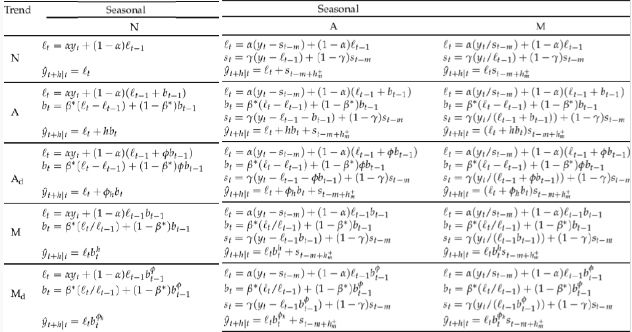

Мы уже говорили о том, что для однократного экспоненциального
сглаживания возможно State-Space представление в форме
пары уравнений, которые вместе с заданным вероятностным распределением
ошибок прогнозов образует полностью специфицированную статистическую 
модель – “инновационную state-space модель” , в которой во всех уравнениях  используется один тот же ряд ошибок                                 
Подобные State-Space представления можно получить и для других
моделей экспоненциального сглаживания.

Каждая модель включает уравнение наблюдений и уравнения состояний – по одному для каждого состояния (уровень, тренд, сезонность).

__Модель с аддитивными и мультипликативными ошибками  с одними и теми же параметрами генерируют одинаковые точечные прогнозы, но различные прогнозные интервалы.__



Для оценивания ETS моделей  можно использовать как метод максимального правдоподобия, применяемый к State – Space представлению модели (модель пространства состояний), так и используя минимизацию средней среднеквадратической ошибки прогнозов на h шагов вперед (AMSE), в процессе которой определяются не только оценки параметров модели, но и оптимальные начальные значения, необходимые для запуска рекуррентных процедур.

Сравнивать между собой разные оцененные ETS модели можно 
на основании информационных критериев, или на основании сравнения качества прогнозов, построенных по этим моделям.


Некоторые затруднения:

- Деление на 0 : для некоторых мультипликативных моделей в процессе оценивания может возникнуть деление на ноль. В таких ситуациях остается рассматривать только модели с аддитивным трендом и сезонными компонентами. 
- Отсутствие сходимости: для некоторых моделей процесс оценивания не сходится. Однако при этом могут сообщаться правдоподобия значения ошибок прогнозов, хотя в действительности оптимизация не была достигнута.

##### HW vs ETS

`HoltWinters()` and `ets()` are optimizing different criterion. `HoltWinters()` is using heuristic values for the initial states and then estimating the smoothing parameters by optimizing the MSE. `ets()` is estimating both the initial states and smoothing parameters by optimizing the likelihood function (which is only equivalent to optimizing the MSE for the linear additive models).

`ets()` searches over a restricted parameter space to ensure the resulting model is forecastable. `HoltWinters()` ignores this issue (it was written before the problem was even discovered). 

##### ARIMA vs ETS

Прогнозы будущих значений ряда, получаемые с использованием некоторых моделей экспоненциального сглаживания, являются одновременно оптимальными прогнозами для соответствующих моделей ARIMA(p,d,q)

- Простое экспоненциальное сглаживание $\approx ARIMA(0,1,1)$ без константы: $b_1 = a - 1 $
- Метод Хольта  $\approx  ARIMA(0,2,2)$: $b_1 = a + \beta -2, b_2 =1-a$
- Метод Хольта-Уинтерса с аддитивной сезонностью  $\approx ARIMA(0,1,s+1)(0,1,0)_s$
- Метод Хольта-Уинтерса с мультипликативной сезонностью не имеет 
ARIMA аналога.



Наличие ARIMA аналога оптимального прогноза для ETS моделей дает возможность
непосредственного построения интервальных прогнозов для модели экспоненциального сглаживания.

Все ETS модели нестационарны, тогда как в классе ARIMA моделей стационарные модели есть.  


####    9. Экстраполирование тренда, оцененного методом наименьших квадратов

В динамике ряда на рассматриваемом периоде может
явно проявляться линейный, полиномиальный или экспоненциальный характер тренда. 

В таких случаях прогнозирование может опираться на результаты оценивания параметров функции, описывающей тренд на всем периоде
наблюдений, а само оценивание можно производить, используя метод наименьших квадратов.



####    10. Фильтр Ходрика - Прескотта

Фильтр Ходрика – Прескотта применяется для получения сглаженной оценки долговременного тренда ряда $x_t$.

$$x_t  = x_t^{trend} + x_t^{cycle}$$

где    $x_t^{trend}$        – “долговременный тренд”,  $x_t^{cycle}$ -  “циклическая компонента” . 


При построении этого фильтра
соответствующий алгоритм подбирает сглаженный
ряд  $s_t$ для которого минимизируется сумма (для заданного $\lambda> 0$):

$$\sum^T_{t=1} (x_t -s_t)^2 + \lambda \sum^{T-1}_{t=2} ((s_{t+1} -s_t) - (s_t-s_{t-1}))^2 = \sum^T_{t=1} (x_t -s_t)^2 + \lambda \sum^{T-1}_{t=2} (\Delta^2s_{t+1})^2  \to \min_{s_t}$$

В качестве оценки циклической компоненты берется $с_t = x_t – s_t$ .


Параметр $\lambda > 0$ управляет гладкостью получаемого ряда. Чем больше  $\lambda$,
тем более гладким является ряд $s_t$. При  $\lambda \to \infty$  ряд $s_t$ задача сводится к подбору линейного тренда
методом наименьших квадратов, при  $\lambda = 0$ ряд  $s_t$  совпадает с исходным рядом. 


В своей оригинальной статье Ходрик и Прескотт для подбора $\lambda$  использовали “правило степени 2” (количество наблюдаемых интервалов времени в год делится на 4, полученная величина возводится в степень 2 и результат умножается на 1600):

- $\lambda = 100$ для годовых данных;
-  $\lambda = 1600$ для квартальных данных;
-  $\lambda  = 14 400$ для месячных данных.



_Эта процедура является фильтрацией:_

Оценка трендовой компоненты в процедуре Ходрика-Прескотта может быть представлена как результат линейной фильтрации - двустороннее скользящее среднее бесконечного порядка: 

 $$ s_t = A(L) x_t \\  A(L) = \sum_{s=-\infty}^{\infty} a_s L^s
 \\ a_s = a_{-s}, \sum_{s=-\infty}^{\infty} a_s = 0 $$


King and Rebelo (1993):

$$s_t = [\lambda L^{-2} (1-L)^4+1]^{-1} x_t  \\ 
A(L) = [\lambda L^{-2} (1-L)^4+1]^{-1} \\ 
c_t = \frac{\lambda L^{-2} (1-L)^4}{\lambda L^{-2} (1-L)^4+1} x_t $$


_Частотный отклик (передаточная функция, Gain)_ произвольного фильтра  $A(L)$ определяется как:

$$ |A(e^{-iw})| = |\sum_{s=-\infty}^{\infty} a_s e^{-iws} |
\\ \frac{f_y(w)}{f_x(w)}= |A(e^{-iw})|^2 = |\sum_{s=-\infty}^{\infty} a_s e^{-iws}|^2$$


Передаточная функция HP фильтра имеет вид:



$$|A(w,\lambda )| = \frac{4 \lambda  (1-cos(w))^2}{4 \lambda  (1-cos(w))^2+1}  $$


_Аппроксимация идеального фильтра:_ 



Разбиение ряда на долговременный тренд и циклическую компоненту предполагает, что 
- долговременный тренд складывается из низкочастотных, 
- циклическая компонента – из высокочастотных составляющих.

Переход от самого ряда  $x_t$  к $c_t$  можно интерпретировать как результат удаления из ряда $x_t$  составляющих, имеющих низкие частоты (или их существенного ослабления). 

Если компонента $c_t$ должна содержать только колебания с частотами 
$\{w: 0\leq w_0 \leq w \leq \pi \}$ что соответствует циклам длины $2\pi/w_0$ и менее, и при этом должны быть в максимальной мере сохранены мощности включаемых в компоненту $c_t$ колебаний, то тогда передаточная функция соответствующего “идеального” линейного фильтра __(фильтра высоких частот)__ должна иметь вид:

$$  |A(e^{-iw})| = \begin{cases} 0, |w| < w_0  \\1, w_0 \leq  |w| < \pi   \end{cases} $$

Этот фильтр имеет представление: 

$$A(L) = 1 - \frac{w_0}{\pi} - \sum_{s=-\infty}^{\infty}  \frac{\sin(w_0 k)}{\pi k } (L^k + L^{-k}) $$ 

и требует бесконечного количества наблюдений.  Поэтому реально осуществимые фильтры не могут полностью отсекать заданные полосы частот.

Выбор Ходриком и Прескоттом для квартальных данных значения  
$λ = 1600$   был обусловлен желанием аппроксимировать идеальный фильтр верхних частот, дающий циклическую компоненту, включающую только флуктуации с периодом менее 8 лет.  Для квартальных данных 8 лет – это 32 точки – соответствуют полному циклу 2π, так что на π приходится 16 точек. Это соответствует частоте среза  $w_0 \pi/16 = 0.196$.    




_Проблема концов интервала, на котором производится сглаживание_

При использовании HP фильтра на бесконечной выборке 
он обладает следующими важными свойствами:
- Этот фильтр симметричен, так что он не приводит к фазовому сдвигу на любой частоте. 
- Переходная функция этого фильтра аппроксимирует переходную функцию идеального фильтра высоких частот при надлежащем выборе значения параметра  $λ$.


Поскольку, так или иначе, выборка не является бесконечной, то
HP фильтр теряет эти свои привлекательные свойства. 

При использовании выборки конечного объема возникают так называемые “end-of-sample problems”  – проблемы вблизи левого и правого конца интервала выборки.

В этом случае:
- Весовые коэффициенты в действительности изменяются в зависимости от значения $t$, для которого оценивается тренд. 
- Фильтр перестает быть симметричным (становится фактически близким к одностороннему), индуцируя фазовый сдвиг на каждой частоте, хотя этот сдвиг может быть пренебрежимым, за исключением первых и последних наблюдений в выборке. 
- Более того, для этих первых и последних наблюдений фильтр перестает аппроксимировать идеальный фильтр верхних частот.

Решение:
- Baxter and King (1995) рекомендуют отбрасывать на обоих концах выборки получаемые значения $c_t$  для 3 лет, как при использовании годовых, так и при использовании квартальных данных. 
- Другой подход состоит в прогнозировании ряда за пределы 
имеющейся выборки и применении HP фильтра к расширенной
выборке, с тем чтобы получить более близкие к оптимальным
значения $c_t$  в конце выборки. Однако здесь всё зависит от оптимальности прогноза.

_Проблема при применении HP фильтра:_ 

HP фильтр является оптимальным (в смысле минимизации среднего квадрата ошибки), если (Whittle,1983): 

$$\Delta^2 x_t^{trend} = B(L)\zeta_t \\ x_t^{cycle} = B(L) e_t$$

где $B(L) = \sum_{j=0}^{\infty} b_j L^j, \sum_{j=0}^{\infty}b^2_j < \infty $,  $e_t \sim NID (0, \sigma^2_e), \zeta_t \sim NID (0, \sigma^2_\zeta) $ - независимы друг от друга и $\lambda =  \sigma^2_e / \sigma^2_\zeta$

Если здесь $B(L)$ не имеет единичного корня, то трендовая составляющая представляет собой $I(2)$ процесс, а циклическая
составляющая – $I(0)$ процесс. 

В этой ситуации: 

- оценка $s = (s_1, ... , s_T)'$  , получаемая в результате минимизации, используемой в HP фильтре, является оценкой максимального правдоподобия. 

- получено выражение для логарифмической функции правдоподобия для параметра сглаживания.

Использование HP фильтра на практике нельзя обосновать аргументацией оптимальной фильтрации:

- Если предполагать, что трендовая и циклическая компоненты ряда 
   не коррелированы между собой, то это означает, что они порождаются 
   самостоятельными  экономическими силами.

- Предположение о том, что  $x_t$  является $I(2)$-рядом, редко выполнено
   для макроэкономических временных рядов.

_Проблема при применении HP фильтра к I(1) ряду:_ 

HP оценка циклической компоненты имеет вид:

$$ c_t = \frac{\lambda L^{-2} (1-L)^4}{\lambda L^{-2} (1-L)^4+1} x_t = \frac{\lambda  (1-L)^4}{\lambda L^{-2} (1-L)^4+1} x_{t+2} $$

Предположим, что  $x_t \sim I(1)$.

Тогда ряд   $(1-L)x_t$     стационарный, а ряд $c_t$  передифференцированный, что может приводить к появлению
ложных циклов (эффект Слуцкого).

$$ c_t = \frac{\lambda L^{-2} (1-L)^3}{\lambda L^{-2} (1-L)^4+1} (1-L) x_{t} $$


In [17]:
library( forecast )
white_noise <- arima.sim(model = list(order = c(0, 0, 0)), n = 300)

In [7]:
auto.arima(white_noise)

Series: white_noise 
ARIMA(2,0,1) with zero mean 

Coefficients:
          ar1      ar2     ma1
      -0.8332  -0.0521  0.8913
s.e.   0.0902   0.0622  0.0707

sigma^2 estimated as 0.947:  log likelihood=-416.08
AIC=840.16   AICc=840.29   BIC=854.97

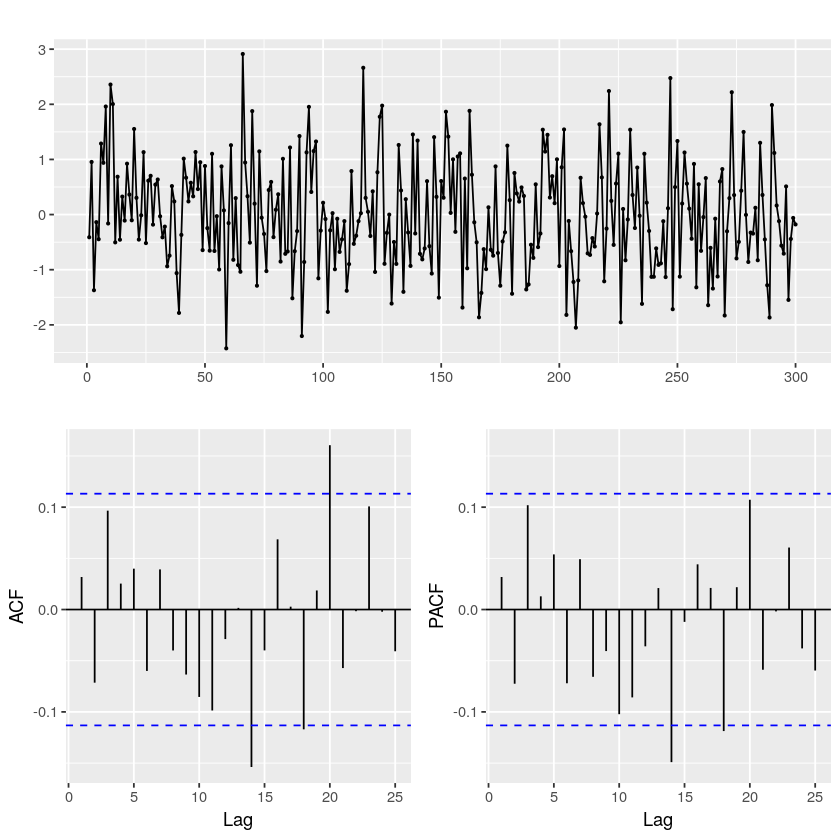

In [10]:
ggtsdisplay(white_noise, main="") 

In [8]:
auto.arima(diff(white_noise))

Series: diff(white_noise) 
ARIMA(1,0,3) with zero mean 

Coefficients:
          ar1      ma1      ma2     ma3
      -0.7706  -0.1627  -0.8777  0.0582
s.e.   0.1098   0.1209   0.0763  0.0673

sigma^2 estimated as 0.9577:  log likelihood=-417.81
AIC=845.63   AICc=845.83   BIC=864.13

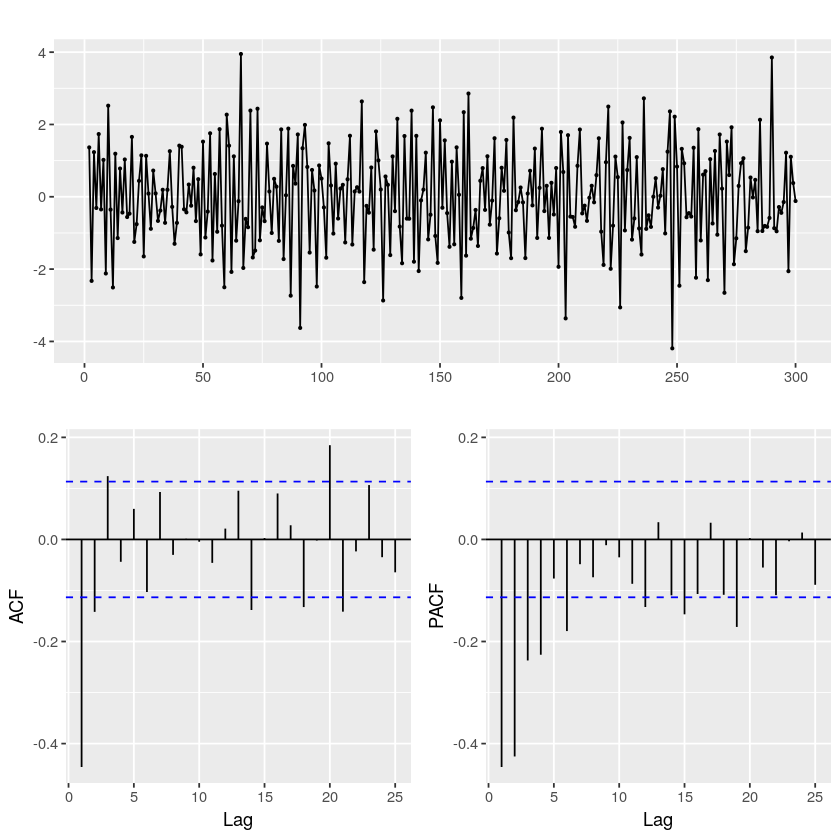

In [11]:
ggtsdisplay(diff(white_noise), main="") 

In [16]:
auto.arima(diff(diff(white_noise),4))

Series: diff(diff(white_noise), 4) 
ARIMA(5,0,0) with non-zero mean 

Coefficients:
          ar1      ar2      ar3      ar4      ar5     mean
      -0.7276  -0.4711  -0.2778  -0.5854  -0.2699  -0.0033
s.e.   0.0561   0.0616   0.0654   0.0613   0.0560   0.0239

sigma^2 estimated as 1.879:  log likelihood=-509.47
AIC=1032.95   AICc=1033.34   BIC=1058.75

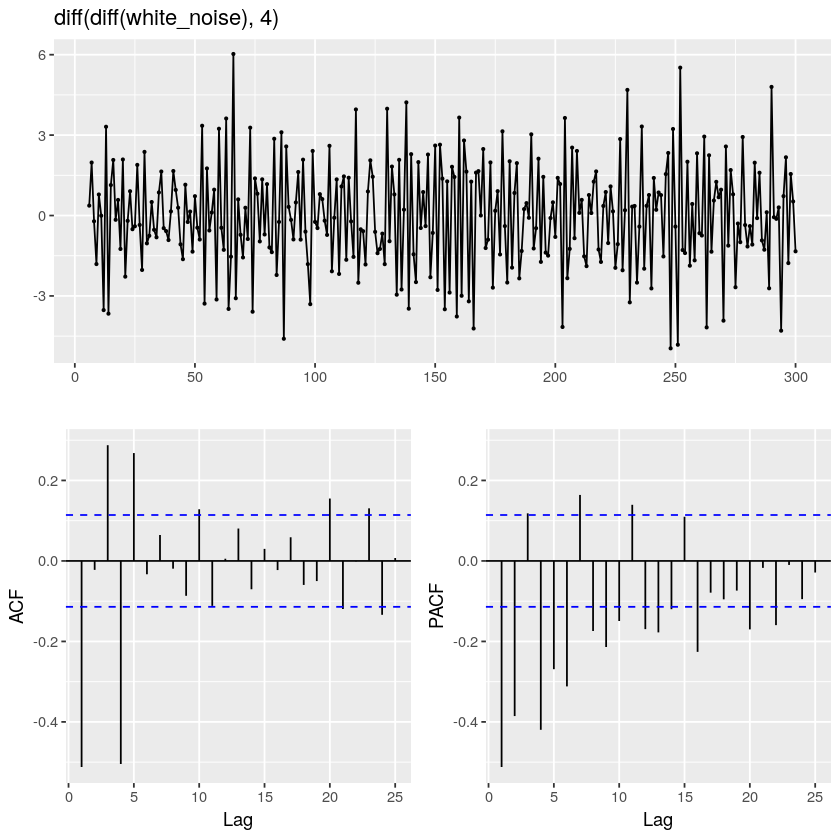

In [15]:
ggtsdisplay(diff(diff(white_noise),4))

####    11. Фильтр Бакстера - Кинга

Полосно-пропускающий фильтр Бакстера-Кинга - это метод сглаживания временного ряда, который является модификацией фильтра Ходрика-Прескотта с более широкими возможностями исключения циклической составляющей во временном ряде.

Подход Бакстера и Кинга (1995) по существу явился попыткой
аппроксимировать с помощью центрированного скользящего среднего конечного порядка идеальный полосовой фильтр (band-pass, BP), соответствующий определению бизнес-цикла, согласно которому бизнес-цикл состоит из флуктуаций, имеющих период не менее 6 и не более 32 кварталов, т.е. не менее 1.5 и не более 8 лет. Это соответствует частотам в интервале от π/16 до π/3. 


$$c_t = H^k_{BP} (L) = \sum_{j=-k}^k a_j x_{t-j} $$


_Идеальный полосовой фильтр (band-pass, BP), который аппроксимирует BP фильтр:_

$$  |A(e^{-iw})| = \begin{cases} 0,  \pi/16 < |w| < \pi/3  \\ 1, 0  \leq  |w| \leq  \pi/16,   \pi/3 \leq  |w| \leq \pi   \end{cases} $$


При использовании BP фильтра также возникают “end-of-sample problems”. 

Как и в случае HP фильтра, один из  подходов состоит в прогнозировании ряда за пределы имеющейся выборки и применении фильтра к расширенной выборке.
 
Поскольку фильтр Бакстера – Кинга является полосовым фильтром, то он может применяться и к сезонно-скорректированным данным, и к сезонно нескорректированным (сырым) данным. 

По той же причине циклическая компонента, полученная
применением фильтра Бакстера–Кинга является более гладкой,
чем полученная при применении HP фильтра, поскольку BP фильтр 
отсекает “нерегулярную” компоненту ряда.





####    12. Характеристики качества прогнозов

1. Root Mean Squared Error (RMSE) - корень из среднего квадрата ошибки
прогноза ряда $у_t$ на прогнозном периоде. Зависит от единицы измерений:

$$RMSE = \sqrt{1/h \sum (\hat{y}_t - y_t)^2}$$

2. Mean Absolute Error (МАЕ) — средняя абсолютная ошибка прогноза
ряда $у_t$ на прогнозном периоде. Зависит от единицы измерений:

$$ МАЕ = 1/h \sum |\hat{y}_t - y_t | $$

3. Mean Absolute Percent Error (МАРЕ) — средняя абсолютная процентная
ошибка прогноза ряда  $у_t$ на прогнозном периоде. Не зависит от единицы измерений,  однако если некоторые значения ряда близки к нулю, то MAPE может быть весьма большой, искажая реальную картину:

$$ МАРЕ = 1/h \sum \frac{|\hat{y}_t - y_t |}{y_t} * 100\% $$ 

4. Theil Inequality Coefficient (TIC) — нормированный коэффициент Тейла,  значения которого изменяются от 0 до 1 (близкие к 0 значения TIC свидетельствуют о хорошем качестве прогноза):

$$TIC = \frac{\sqrt{1/h \sum (\hat{y}_t - y_t)^2}}{\sqrt{1/h \sum (\hat{y}_t)^2} + \sqrt{1/h \sum (y_t)^2}}$$

5. Разложение среднего квадрата ошибки прогноза на  $h$  шагов вперед:
$$1/n \sum (\hat{y}_t - y_t)^2 = (\bar{\hat{y}} - \bar{y})^2 + (s_{\hat{y}} - s_y)^2 + 2 (1-r) s_{\hat{y}}s_y$$
где $\bar{\hat{y}}, \bar{y}, s_{\hat{y}}, s_y$  — выборочные средние и стандартные отклонения рядов $\hat{y}_t$ и $y_t$ на прогнозном периоде, 
$r$ — выборочный коэффициент корреляции между $\hat{y}$ и $y$ на прогнозном периоде.

    - Bias Proportion — доля первого слагаемого в сумме. Большие значения этого показателя соответствуют _систематическому смещению прогнозных значений_ по одну сторону от наблюдаемых значений ряда на прогнозном периоде.
    - Variance Proportion — доля второго слагаемого в сумме. Большие значения этого показателя наблюдаются при _расхождению размаха_  колебаний ряда прогнозных значений
    и размаха ряда наблюдаемых значений ряда на прогнозном периоде.
    - Covariance Proportion — доля третьего слагаемого в сумме.  Эта доля соответствует остающимся _несистематическим ошибкам   прогноза_ 
    У хорошего прогноза эта доля должна быть велика. Малые значения этого показателя соответствуют расхождению по фазе колебаний ряда прогнозных и наблюдаемых значений ряда на прогнозном периоде. 

_Оптимальный прогноз_

$ \Omega_T = \{x_t, t = 1, ..., T\}$ - информационное множество, содержащее всю имеющуюся информацию, на основании которой строится прогнозное значение, так что прогнозное значение описывается  $x_{T+1|T}=g(\Omega_T)$. 

Чтобы
получить в такой ситуации в некотором смысле наилучший (оптимальный)
прогноз, необходим критерий, на основании которого можно было бы сравнивать разные прогнозы (с различными функциями $g$). Для выбора такого
критерия обычно используют концепцию функции потерь, состоящую
в принятии соглашения о том, что ошибка в прогнозе на величину $\Delta$ приводит к издержкам $C(\Delta)$, где $C(z)$ — некоторая функция, для которой
$C(0) = 0$ и $C(z) > 0$ при $z \neq 0$. Если такая функция выбрана, то издержки прогноза равны $C(e_{T+1|T})$

Естественный критерий выбора наилучшего точечного прогноза на момент $(T + 1)$ состоит в выборе такого прогноза, для которого минимизируются
ожидаемые издержки $E(C(e_{T+1|T})|\Omega_T)$. Здесь математическое ожидание соответствует условному распределению случайной величины $x_{T+1}$ при использовании информационного множества   $\Omega_T$. 

Наиболее часто используется
квадратичная функция потерь $C(z) = bx^2, b > 0$. В этом случае оптимальный
прогноз имеет вид:
$$x_{T+h|T} = E(x_{T+h} | \Omega_T) $$

####    13. Прогнозирование по модели AR(p)

Для AR(1):

Оптимальный точечный прогноз на $h$ шагов вперед равен:
$$f_{T,h} = E(x_{T+h} | \Omega_T ) = (1 + a_1 + ...+ a_1^{h-1} ) a_0 + a_1^hx_T $$ 


Поскольку у стационарного AR(1) процесса $|a_1 | < 1$, при $h \to \infty$ 
$$ (1 + a_1 + ...+ a_1^{h-1} ) a_0 + a_1^hx_T \to \frac{a_0}{1-a_1} = \mu $$ 
где $\mu$  — математическое ожидание процесса $x_t$

По той же причине $a_1^h x_T \to  0 $,
так что с увеличением $h$ влияние значения $x_T$ на прогноз значения $x_{T+h}$ убывает, а само прогнозное значение приближается к математическому ожиданию процесса $x_T$

Последовательность ошибок одношаговых прогнозов процесса AR(1) образует процесс белого шума.

_Вообще, правило получения оптимального прогноза на $h$ шагов вперед,
по сути, таково:_ 

Берется явное представление для $x_{T+h}$ т.е.
и все входящие в правую часть случайные величины $x_j$ заменяются их оптимальными прогнозами.
- если  $j >T$, то  $x_j$      заменяется на  $f_{T,j-T}$
- eсли      $j \leq T$, то в правую часть подставляется значение, содержащееся в информационном множестве   $\Omega_T$1;
- $ e_{T+h}  $ заменяется нулем. 

####    14. Прогнозирование по модели MA(q)

Для MA(1): 

Последовательность ошибок одношаговых прогнозов образует
процесс белого шума. Что возможность последовательного вычисления прогнозов на один шаг вперед, начиная с некоторого начального значения $f_{0,1}$         . 

Если $h > 1$, то оптимальный прогноз на $h$ шагов вперед равен:
$$f_{T,h} = E(e_{T+h}|\Omega_T) + b_1 Е ( e_{T+h-1} | \Omega_ T)  = 0 $$ 


Для MA(q): 

При вычислении прогноза на $h$ шагов
вперед, где $h \leq q$. В выражении для $x_{T+h}$ все величины, входящие в правую
часть, заменяются их оптимальными прогнозами. При этом будущие значения $e_t$ заменяются нулями, а текущее  и прошлые значения $e_t$ оцениваются по формуле $e_T = x_T - f_{T-1,1} $ с выбором начальных значений $ e_0 = ... = e_{1-q} = 0 $, так что $f_{0,1}=0 $. При $h > q$ в выражение для $x_{T+h}$ входят только будущие (по отношению к моменту Т) значения $e_t$. Поэтому
$$E(x_{T+h}| \Omega_T) = Е(e_{T+h}) = 0, h > q$$

Если рассматривается модель с постоянной составляющей,
тогда  получаем естественное начальное значение $f_{0,1} = \mu $. В этом случае прогноз на большее, чем $q$ шагов вперед равен $\mu$, т.е. математическому ожиданию процесса $x_t$

И здесь выбор начального значения  не играет существенной роли, если значение T не слишком мало и выполнено условие обратимости. 

####    15. Прогнозирование по модели ARMA(p,q)


Прогнозирование для таких
моделей производится в соответствии с алгоритмами, используемыми для
моделей $AR(p), MA(q)$.


Можно показать, что
для произвольного стационарного процесса ARMA(p, q) оптимальный прогноз на h шагов вперед сходится при $h \to \infty$ к математическому ожиданию этого процесса (свойство «возвращения к среднему» (mean reverting )).

####    16. Интервальные прогнозы

Пусть
$x_t$ — стационарный временной ряд с нулевым математическим ожиданием,
порождаемый моделью ARMA(p, q):
$$ x_t = \sum a_j x_{t-j} + \sum b_j e_{t-j}$$
или в компактной форме:
$a(L)x_t = b(L )e_t$.

Такой процесс можно представить в виде процесса МА($\infty$) — скользящего среднего бесконечного порядка:
$$x_t = \sum c_j e_{t-j} = c(B) e_t$$
где $c(z) = \sum c_j z^j = \frac{b(z)}{a(z)}, c_0 =1 $ 


При таком представлении процесса $x_t$ оптимальный прогноз записывается
в виде:
$$f_{T,h} = E(X_{T+h} | \Omega_T ) = \sum_h^\infty c_j e_{T+h-j}$$
так что ошибка прогноза на h шагов вперед равна:
$$ e_{T,h} = x_{T+h} -f_{T,h} = \sum_0^{h-1} c_j e_{T+h-j}$$
Поскольку слагаемые не коррелированы между собой и их математиче­
ские ожидания равны нулю, то
$$D(e_T,h) = E ( e^2_{T,h}) = \sigma^2_e \sum_0^{h-1} c_j^2$$ 


####    17. Общие свойства ошибок прогнозов для моделей ARMА.

1. Ошибки одношаговых прогнозов образуют последовательность не коррелированных между собой случайных величин, тогда как ошибки прогнозов на $h \geq 2 $ шагов вперед в общем случае коррелированы между собой.

2. Точность прогноза убывает с удалением в будущее: $D(e_{T, h+1}) \geq D(e_{T, h}) $ 

3. Если устремить $h \to \infty $, то получим, что $\lim_{h\to \infty}  D(e_{T, h}) = D(x_t)$, т.е. условная (при информации $\Omega_T$) дисперсия ошибки «удаленного» прогноза близка к безусловной дисперсии самого процесса.

####    18. Прогнозирование по моделям ARIMA?

Пусть $х_t$ — процесс типа ARIMA(p, d , q ). Тогда
при построении прогнозов значений ряда xt естественно использовать прогнозные значения, получаемые для стационарного процесса рассмотренными выше методами. 
Таким образом, прогнозирование может осуществляться в два этапа: на
первом — производится прогноз для стационарного ряда
а на втором —
находится прогноз для нестационарного ряда $x_t$.
Впрочем, можно обойтись и без двухшаговой процедуры. 



Затруднение, связанное с необходимостью оценивать значения еп мож­
но преодолеть, как и ранее, двумя способами. Можно положить значения
$e_0, ... ,e_{1-q}$ равными нулю или использовать для их оценивания процедуру обратного прогноза, рассмотренную ранее в разд. 1 ч. 2. В большинстве практических ситуаций оба эти подхода дают близкие результаты.
Исключениями являются случаи, когда в модели $a(L)( 1 - L)^dx_t = b(L)e_t$ хотя
бы один из многочленов $a(z)$ и $b(z)$ имеет корень, близкий к границе единичного круга, или когда временной ряд рассматривается на достаточно коротком периоде.

####    19. Передифференцированные временные ряды

$x_t $  – стационарный процесс с нулевым математическим ожиданием,
         имеющий представление Вольда MA($\infty$)
         
$$x_t = (1 + b_1 L + b_2 L^2 + ... )e_t $$

 Если с ростом  $j$  коэффициенты  $b_j$  достаточно быстро убывают по абсолютной величине, то процесс $x_t$  можно аппроксимировать процессом скользящего среднего конечного порядка (хотя может и достаточно большого)

Условие обратимости: Все  $q$  корней уравнения  $b(z) = 0$ лежат вне единичного круга. Тогда существует эквивалентное представление  МА(q) процесса  $x_t$  
в виде процесса авторегрессии бесконечного порядка  AR($∞$) 

Следствие: 

Если условие обратимости выполнено, то 
процесс  MA(q) можно аппроксимировать процессом авторегрессии AR(p) конечного порядка p

Пусть
$x_t = \Delta e_t $
 процесс – результат дифференцирования процесса белого шума:  
    
    
Поскольку белый шум – стационарный процесс, то процесс  $x_t$  – 
    “передифференцированный”.
    
Для него  и авторегрессионное представление не определено.
 Прогноз не будет оптимальным,  дисперсия ошибки его в 2 раза выше,  чем для оптимального прогноза
 


